In [609]:
# Read data from Sleep Health and Lifestyle dataset CSV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/Users/luigi/Documents/Jupyter_Notebooks/Sleep Health Data Analysis/Sleep_health_and_lifestyle_dataset.csv', index_col='Person ID')
data.head() 


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## Points to review
1. Worst sleep health by gender
2. Sleep health relationship with the professional work from people
3. Does physical activity affect sleep health 
4. What profession has the worst sleep health
5. What kind of profession has the highest level of streess and body mass index
6. Age ranges of sleep disorders 
7. Step count and sleep health 



In [610]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 1 to 374
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 38.0+ KB


In [611]:
data.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


## Limpieza de Datos

In [612]:
data.isnull() # Verificar datos nulos

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
370,False,False,False,False,False,False,False,False,False,False,False,False
371,False,False,False,False,False,False,False,False,False,False,False,False
372,False,False,False,False,False,False,False,False,False,False,False,False


In [613]:
data.isnull().sum()

Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [614]:
drop_data = data.dropna()

In [615]:
drop_data.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [616]:
drop_data.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,46.632258,6.812258,6.870968,60.896774,5.767742,71.787097,6765.806452
std,7.839311,0.773534,1.337325,20.634158,1.946757,5.187381,1893.921881
min,28.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,43.000000,6.300000,6.000000,45.000000,4.000000,68.000000,6000.000000
50%,45.000000,6.500000,7.000000,45.000000,7.000000,72.000000,6000.000000
75%,51.000000,7.400000,8.000000,75.000000,7.000000,75.000000,7000.000000
max,59.000000,8.300000,9.000000,90.000000,8.000000,86.000000,10000.000000


## Gender Distribution

In [617]:
data['Gender'].value_counts()

Gender
Male      189
Female    185
Name: count, dtype: int64

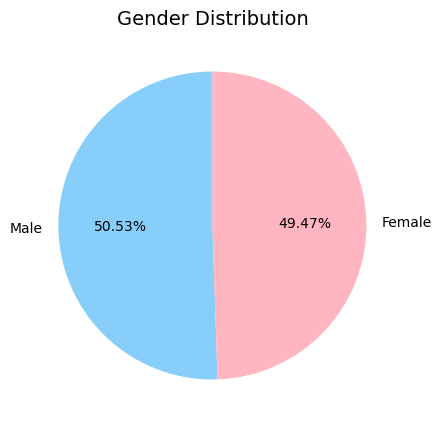

In [618]:
# Graphics gender distribution
plt.figure(figsize=(5, 5))
gender_number = data['Gender'].value_counts()
plt.pie(gender_number, labels=gender_number.index, autopct="%1.2f%%", startangle=90, colors=['lightskyblue', 'lightpink'])
plt.title('Gender Distribution', fontsize=14)
plt.show()

In [619]:
print('Age Mean: ', data['Age'].mean())

Age Mean:  42.18449197860963


In [620]:
print('Age Standard Deviation: ', data['Age'].std())

Age Standard Deviation:  8.67313346554724


In [621]:
data.loc[data['Age'] <= 35, 'Age Category'] = 'Young Adult'
data.loc[data['Age'] >= 40, 'Age Category'] = 'Older Adult'
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age Category
Person ID,,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,Young Adult
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,Young Adult
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,Young Adult
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Young Adult
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Young Adult


In [622]:

# Show last 4 rows 
data.tail()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age Category
Person ID,,,,,,,,,,,,,
370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,Older Adult
371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,Older Adult
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,Older Adult
373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,Older Adult
374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,Older Adult


## Adult Category count 

In [623]:
data['Age Category'].value_counts()

Age Category
Older Adult    213
Young Adult     94
Name: count, dtype: int64

## Agroup Age and Occupupation by Gender 


In [624]:
data.groupby('Gender')['Age'].agg(['mean','std'])

,mean,std
Gender,,
Female,47.405405,8.093407
Male,37.074074,5.662006


In [625]:
data.groupby('Occupation')['Gender'].value_counts()

Occupation            Gender
Accountant            Female    36
                      Male       1
Doctor                Male      69
                      Female     2
Engineer              Female    32
                      Male      31
Lawyer                Male      45
                      Female     2
Manager               Female     1
Nurse                 Female    73
Sales Representative  Male       2
Salesperson           Male      32
Scientist             Female     4
Software Engineer     Male       4
Teacher               Female    35
                      Male       5
Name: count, dtype: int64

In [626]:
print(data.groupby('Occupation')['Sleep Duration'].min(), data.groupby('Occupation')['Sleep Duration'].max())



Occupation
Accountant              6.5
Doctor                  6.0
Engineer                6.5
Lawyer                  6.9
Manager                 6.9
Nurse                   5.9
Sales Representative    5.9
Salesperson             6.3
Scientist               5.8
Software Engineer       5.9
Teacher                 6.3
Name: Sleep Duration, dtype: float64 Occupation
Accountant              8.0
Doctor                  8.2
Engineer                8.5
Lawyer                  7.9
Manager                 6.9
Nurse                   8.2
Sales Representative    5.9
Salesperson             6.5
Scientist               6.2
Software Engineer       7.5
Teacher                 7.2
Name: Sleep Duration, dtype: float64


## Profesion with worst Quality of Sleep

In [627]:
data.groupby('Gender')[['Sleep Duration', 'Quality of Sleep']].mean()

,Sleep Duration,Quality of Sleep
Gender,,
Female,7.229730,7.664865
Male,7.036508,6.968254


In [628]:
SQ = data.groupby('Occupation')[['Sleep Duration', 'Quality of Sleep']].mean()
SQ.sort_values(by='Quality of Sleep')


,Sleep Duration,Quality of Sleep
Occupation,,
Sales Representative,5.900000,4.000000
Scientist,6.000000,5.000000
Salesperson,6.403125,6.000000
Software Engineer,6.750000,6.500000
Doctor,6.970423,6.647887
Teacher,6.690000,6.975000
Manager,6.900000,7.000000
Nurse,7.063014,7.369863
Accountant,7.113514,7.891892


## Relationship between Physical Activity Level and Quality of Sleep

In [629]:
print(data['Physical Activity Level'].min(), data['Physical Activity Level'].max())

30 90


In [630]:
data.groupby('Gender')[['Physical Activity Level', 'Quality of Sleep']].mean()

,Physical Activity Level,Quality of Sleep
Gender,,
Female,59.140541,7.664865
Male,59.201058,6.968254


## Profesion with the highest level of stress and BMI

In [631]:
data.groupby('Occupation')[['Stress Level', 'BMI Category', 'Daily Steps']].value_counts()

Occupation            Stress Level  BMI Category   Daily Steps
Accountant            4             Normal         7000           26
                      7             Overweight     6000            6
                      3             Normal Weight  7500            2
                      6             Normal Weight  7300            2
                                                   7000            1
Doctor                6             Normal         8000           32
                      8             Normal         5000           25
                                                   8000            6
                      3             Normal Weight  10000           2
                                    Obese          3700            2
                      5             Obese          3500            2
                      8             Normal         10000           2
Engineer              3             Normal         5000           32
                      5             Norm

## Age vs Sleep Disorder

In [632]:
SD = data.groupby('Age')['Sleep Disorder'].value_counts()
SD.sort_values()

Age  Sleep Disorder
42   Insomnia           1
28   Insomnia           1
53   Insomnia           1
30   Insomnia           1
     Sleep Apnea        1
31   Sleep Apnea        1
33   Insomnia           1
50   Insomnia           1
35   Sleep Apnea        1
48   Sleep Apnea        1
41   Insomnia           1
55   Sleep Apnea        2
48   Insomnia           2
43   Sleep Apnea        2
42   Sleep Apnea        2
28   Sleep Apnea        2
38   Sleep Apnea        2
29   Insomnia           2
36   Sleep Apnea        2
     Insomnia           2
39   Insomnia           2
34   Sleep Apnea        2
29   Sleep Apnea        2
51   Sleep Apnea        3
58   Sleep Apnea        6
52   Insomnia           6
57   Sleep Apnea        8
49   Sleep Apnea       10
45   Insomnia          11
59   Sleep Apnea       14
43   Insomnia          17
50   Sleep Apnea       17
44   Insomnia          28
Name: count, dtype: int64